In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [75]:
df = pd.read_json("output/judex-mini_ADI_1-1000.jsonl", lines=True)

In [76]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983 entries, 0 to 982
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   incidente       983 non-null    int64  
 1   classe          983 non-null    object 
 2   processo_id     983 non-null    int64  
 3   numero_unico    983 non-null    object 
 4   meio            983 non-null    object 
 5   publicidade     983 non-null    object 
 6   badges          983 non-null    object 
 7   assuntos        983 non-null    object 
 8   data_protocolo  983 non-null    object 
 9   orgao_origem    983 non-null    object 
 10  origem          983 non-null    object 
 11  numero_origem   810 non-null    object 
 12  volumes         983 non-null    int64  
 13  folhas          983 non-null    int64  
 14  apensos         942 non-null    float64
 15  relator         983 non-null    object 
 16  primeiro_autor  982 non-null    object 
 17  partes          983 non-null    obj

In [77]:
df.head()

,incidente,classe,processo_id,numero_unico,meio,publicidade,badges,assuntos,data_protocolo,orgao_origem,...,partes,andamentos,sessao_virtual,deslocamentos,peticoes,recursos,pautas,status,extraido,html
0,1480010,ADI,1,0003935-39.1988.0.01.0000,FISICO,PUBLICO,[],[ASSUNTO PARA PROCESSO ANTIGO | | PROCESSO ANT...,06/10/1988,FÓRUM DA COMARCA DE RANCHARIA,...,"[{'index': 1, 'tipo': 'REQTE.(S)', 'nome': 'GO...","[{'index_num': 21, 'data': '13/12/2023', 'nome...",[],"[{'index_num': 13, 'guia': '6/2021', 'recebido...",[],[],[],200,2025-10-22T11:43:21.711385,"<html lang=""pt-BR""><head> <meta charset=""UTF-8..."
1,1480183,ADI,2,0004022-92.1988.0.01.0000,FISICO,PUBLICO,[],[ASSUNTO PARA PROCESSO ANTIGO | | PROCESSO ANT...,12/10/1988,FÓRUM DA COMARCA DE RANCHARIA,...,"[{'index': 1, 'tipo': 'REQTE.(S)', 'nome': 'FE...","[{'index_num': 28, 'data': '23/01/2007', 'nome...",[],"[{'index_num': 20, 'guia': '6/2021', 'recebido...","[{'index': 3, 'id': '27885/1992', 'data': '28/...",[],[],200,2025-10-22T11:43:32.629997,"<html lang=""pt-BR""><head> <meta charset=""UTF-8..."
2,1480234,ADI,3,0004050-60.1988.0.01.0000,FISICO,PUBLICO,[],[ASSUNTO PARA PROCESSO ANTIGO | | PROCESSO ANT...,12/10/1988,FÓRUM DA COMARCA DE RANCHARIA,...,"[{'index': 1, 'tipo': 'REQTE.(S)', 'nome': 'CO...","[{'index_num': 21, 'data': '02/10/1992', 'nome...",[],"[{'index_num': 13, 'guia': '209/2019', 'recebi...",[],[],[],200,2025-10-22T11:43:43.724450,"<html lang=""pt-BR""><head> <meta charset=""UTF-8..."
3,1480210,ADI,4,0004038-46.1988.0.01.0000,FISICO,PUBLICO,[],[ASSUNTO PARA PROCESSO ANTIGO | | PROCESSO ANT...,12/10/1988,FÓRUM DA COMARCA DE RANCHARIA,...,"[{'index': 1, 'tipo': 'REQTE.(S)', 'nome': 'PA...","[{'index_num': 34, 'data': '19/08/1993', 'nome...",[],"[{'index_num': 13, 'guia': '209/2019', 'recebi...","[{'index': 6, 'id': '5743/1994', 'data': '10/0...",[],[],200,2025-10-22T11:43:56.116154,"<html lang=""pt-BR""><head> <meta charset=""UTF-8..."
4,1480556,ADI,5,0004206-48.1988.0.01.0000,FISICO,PUBLICO,[],[ASSUNTO PARA PROCESSO ANTIGO | | PROCESSO ANT...,18/10/1988,FÓRUM DA COMARCA DE RANCHARIA,...,"[{'index': 1, 'tipo': 'REQTE.(S)', 'nome': 'GO...","[{'index_num': 19, 'data': '18/05/1992', 'nome...",[],"[{'index_num': 14, 'guia': '209/2019', 'recebi...",[],[],[],200,2025-10-22T11:44:06.225854,"<html lang=""pt-BR""><head> <meta charset=""UTF-8..."


In [78]:
df["meio"] = df["meio"].astype("category")
df["publicidade"] = df["publicidade"].astype("category")
df["orgao_origem"] = df["orgao_origem"].astype("category")
df["origem"] = df["origem"].astype("category")
df["relator"] = df["relator"].astype("category")

df["data_protocolo"] = pd.to_datetime(df["data_protocolo"], format="%d/%m/%Y")

In [80]:
make_json = lambda x: json.dumps(x) if x else None

df["assuntos"] = df["assuntos"].apply(make_json)
df["partes"] = df["partes"].apply(make_json)
df["recursos"] = df["recursos"].apply(make_json)
df["pautas"] = df["pautas"].apply(make_json)
df["peticoes"] = df["peticoes"].apply(make_json)
df["deslocamentos"] = df["deslocamentos"].apply(make_json)
df["andamentos"] = df["andamentos"].apply(make_json)

In [85]:
get_len = lambda x: len(json.loads(x)) if x else None

df["assuntos_len"] = df.assuntos.apply(get_len)
df["partes_len"] = df.partes.apply(get_len)
df["recursos_len"] = df.recursos.apply(get_len)
df["pautas_len"] = df.pautas.apply(get_len)
df["peticoes_len"] = df.peticoes.apply(get_len)
df["deslocamentos_len"] = df.deslocamentos.apply(get_len)
df["andamentos_len"] = df.andamentos.apply(get_len)

In [88]:
df[["assuntos_len", "partes_len", "recursos_len", "pautas_len", "peticoes_len", "deslocamentos_len", "andamentos_len"]].describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
assuntos_len,982.0,1.11,0.34,1.0,1.0,1.0,1.0,4.0
partes_len,982.0,3.24,0.70,2.0,3.0,3.0,4.0,4.0
recursos_len,28.0,1.14,0.36,1.0,1.0,1.0,1.0,2.0
peticoes_len,646.0,3.50,5.85,1.0,1.0,2.0,4.0,115.0
deslocamentos_len,983.0,20.09,11.58,1.0,11.0,17.0,27.0,80.0
andamentos_len,980.0,32.57,20.33,1.0,20.0,29.0,42.0,167.0


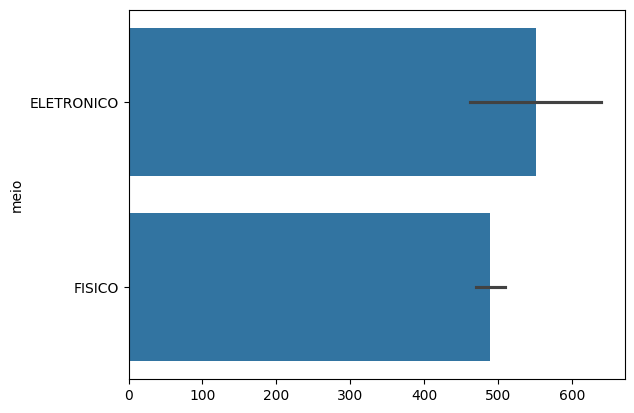

In [133]:
sns.barplot(df["meio"]);

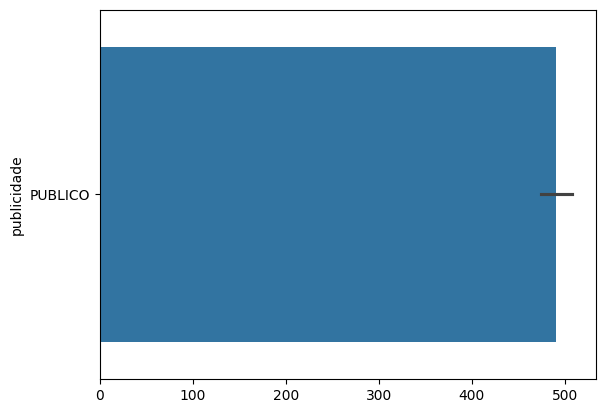

In [103]:
sns.barplot(df["publicidade"]);

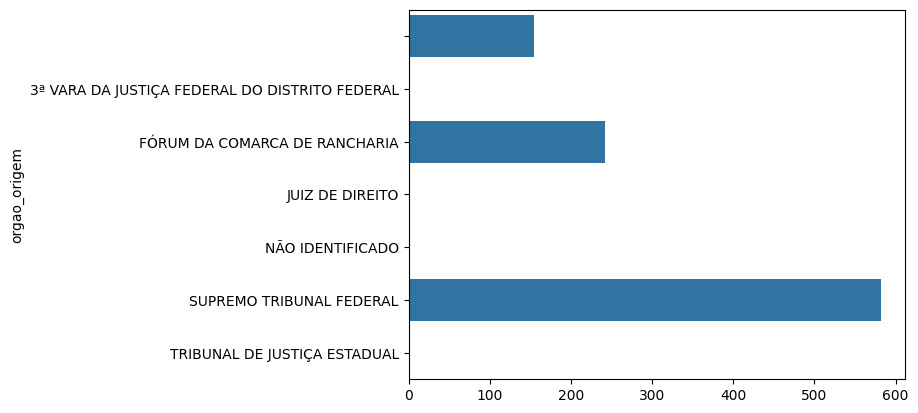

In [119]:
orgao_origem_counts = df["orgao_origem"].value_counts().sort_values(ascending=False)
sns.barplot(x=orgao_origem_counts.values, y=orgao_origem_counts.index, orient="h");

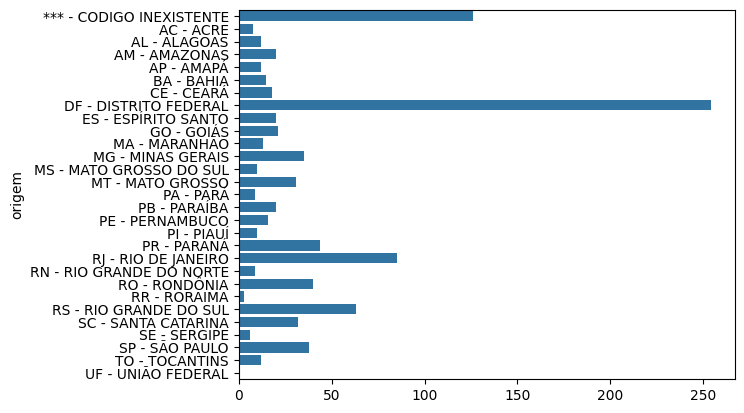

In [123]:
origem_counts = df["origem"].value_counts().sort_values(ascending=True)
sns.barplot(x=origem_counts.values, y=origem_counts.index, orient="h");

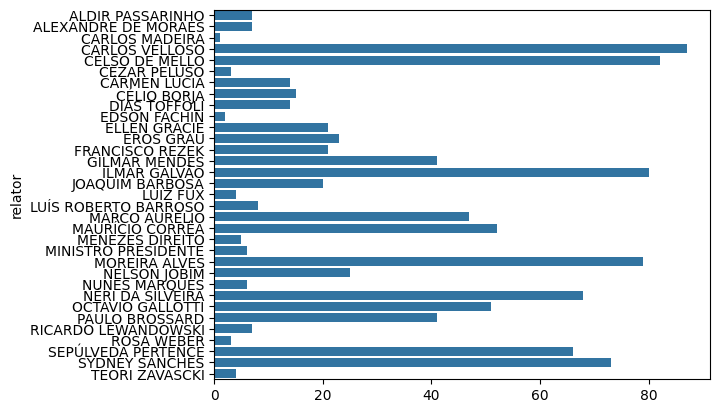

In [126]:
relator_counts = df["relator"].value_counts().sort_values(ascending=True)
sns.barplot(x=relator_counts.values, y=relator_counts.index, orient="h");

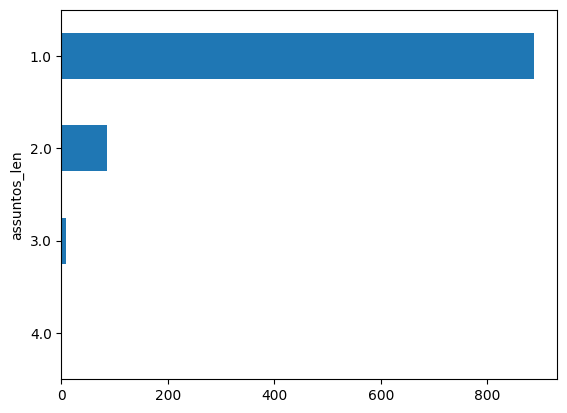

In [128]:
df["assuntos_len"].value_counts().sort_values(ascending=True).plot.barh();

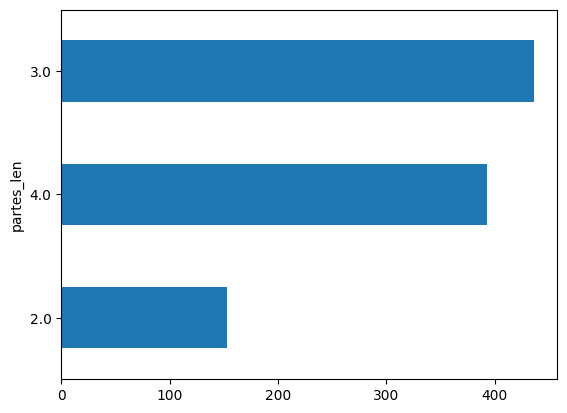

In [129]:
df["partes_len"].value_counts().sort_values(ascending=True).plot.barh();

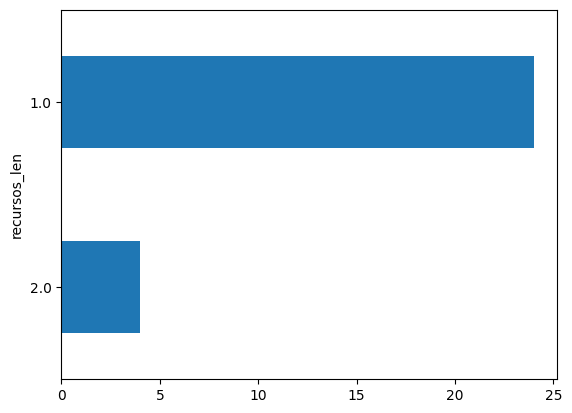

In [130]:
df["recursos_len"].value_counts().sort_values(ascending=True).plot.barh();

IndexError: index 0 is out of bounds for axis 0 with size 0

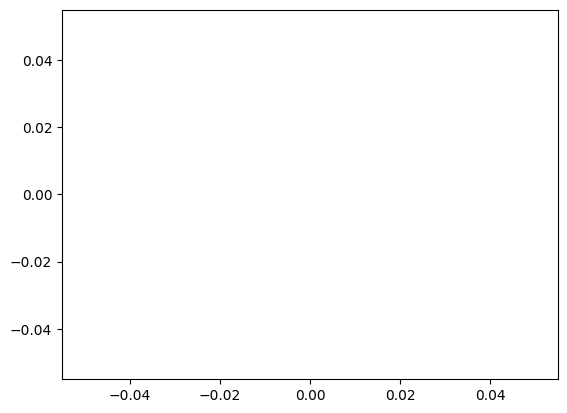

In [131]:
df["pautas_len"].value_counts().sort_values(ascending=True).plot.barh();

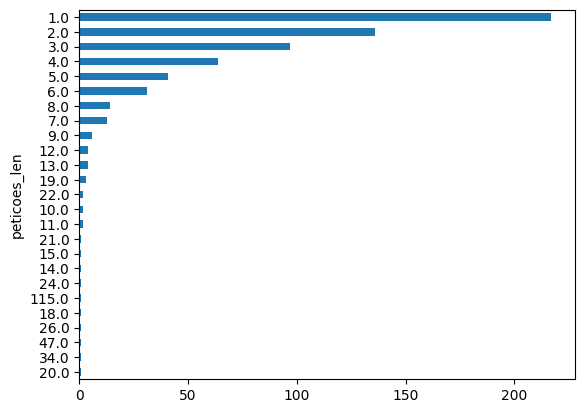

In [132]:
df["peticoes_len"].value_counts().sort_values(ascending=True).plot.barh();

In [101]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983 entries, 0 to 982
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   incidente          983 non-null    int64         
 1   classe             983 non-null    object        
 2   processo_id        983 non-null    int64         
 3   numero_unico       983 non-null    object        
 4   meio               983 non-null    category      
 5   publicidade        983 non-null    category      
 6   badges             983 non-null    object        
 7   assuntos           982 non-null    object        
 8   data_protocolo     983 non-null    datetime64[ns]
 9   orgao_origem       983 non-null    category      
 10  origem             983 non-null    category      
 11  numero_origem      810 non-null    object        
 12  volumes            983 non-null    int64         
 13  folhas             983 non-null    int64         
 14  apensos   

In [100]:
df.to_feather("ADI_1-1000.feather")